In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
df=pd.read_csv("insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [6]:

dtypes=df.dtypes
n_unique=df.nunique()
pd.DataFrame({"Dtypes":dtypes,"N_uniq":n_unique}).T

,age,sex,bmi,children,smoker,region,charges
Dtypes,int64,object,float64,int64,object,object,float64
N_uniq,47,2,548,6,2,4,1337


In [7]:
cat_cols = ['sex', 'children', 'smoker', 'region']
df[cat_cols] = df[cat_cols].astype("category")

In [8]:
pd.DataFrame(df.dtypes).T

,age,sex,bmi,children,smoker,region,charges
0,int64,category,float64,category,category,category,float64


In [9]:
pd.DataFrame(df.isnull().sum()).T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


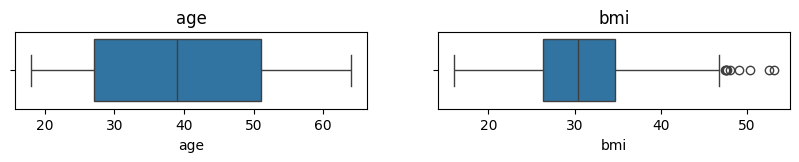

In [10]:
num_cols = ['age', 'bmi']
plt.figure(figsize=(10, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.title(f"{col}")
    sns.boxplot(df[col], orient="h")
plt.show()

In [11]:
Q1 = df.bmi.quantile(.25)
Q3 = df.bmi.quantile(.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
outliers = df[df.bmi > upper].bmi.values
df.bmi.replace(outliers, upper, inplace=True)

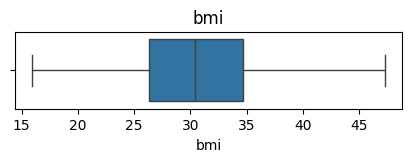

In [12]:
plt.figure(figsize=(5, 1))
plt.title("bmi")
sns.boxplot(df.bmi, orient="h")
plt.show()